In [419]:
import numpy as np
import pandas as pd
import statsmodels as sm
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import zscore

In [420]:
met_df = pd.read_csv("../data/PL_MET_2021-2024.csv", skiprows=[1,2]).convert_dtypes()
oc_df = pd.read_csv("../data/PL_OCEAN_2021-2024.csv", skiprows=[1,2]).convert_dtypes()

In [421]:
met_df.columns = met_df.columns.str.lower().str.replace(" ", "_")
oc_df.columns = oc_df.columns.str.lower().str.replace(" ", "_")

In [422]:
met_df["time_(utc)"] = pd.to_datetime(met_df["time_(utc)"])
oc_df["time_(utc)"] = pd.to_datetime(oc_df["time_(utc)"])

/var/folders/rk/qwqd81bx00b1rl2fj8gy_vnc0000gn/T/ipykernel_58068/3744391951.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  met_df["time_(utc)"] = pd.to_datetime(met_df["time_(utc)"])
/var/folders/rk/qwqd81bx00b1rl2fj8gy_vnc0000gn/T/ipykernel_58068/3744391951.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oc_df["time_(utc)"] = pd.to_datetime(oc_df["time_(utc)"])


In [423]:
merged_df = pd.merge(met_df, oc_df)
merged_df = merged_df.sort_values(by='time_(utc)').set_index('time_(utc)')

In [424]:
merged_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
latitude,286675.0,38.03282,0.092174,0.00002,38.03322,38.03334,38.0334,40.51818
longitude,286659.0,-76.336396,0.183294,-80.1045,-76.33748,-76.33733,-76.3373,0.00002
air_temperature_qc,287793.0,1.233814,0.653142,1.0,1.0,1.0,1.0,9.0
air_temperature,287793.0,13.719424,8.472213,-10.81,6.7,13.23,21.53,34.78
air_pressure_qc,287631.0,1.184399,0.571211,1.0,1.0,1.0,1.0,9.0
air_pressure,287631.0,1017.838278,7.895849,943.75,1013.33,1017.96,1022.7,1057.09
humidity_qc,143807.0,1.906514,0.472247,1.0,2.0,2.0,2.0,4.0
humidity,24671.0,77.659621,17.529309,7.4,63.55,78.6,94.9,100.0
wind_speed_qc,287713.0,1.172811,0.401266,1.0,1.0,1.0,1.0,9.0
wind_speed,286668.0,5.405303,3.086093,0.0,3.3,5.04,7.06,312.94


In [425]:
qc_list = [col for col in merged_df.columns if "qc" in col]
merged_df = merged_df.drop(columns=qc_list)
merged_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
latitude,286675.0,38.03282,0.092174,0.00002,38.03322,38.03334,38.0334,40.51818
longitude,286659.0,-76.336396,0.183294,-80.1045,-76.33748,-76.33733,-76.3373,0.00002
air_temperature,287793.0,13.719424,8.472213,-10.81,6.7,13.23,21.53,34.78
air_pressure,287631.0,1017.838278,7.895849,943.75,1013.33,1017.96,1022.7,1057.09
humidity,24671.0,77.659621,17.529309,7.4,63.55,78.6,94.9,100.0
wind_speed,286668.0,5.405303,3.086093,0.0,3.3,5.04,7.06,312.94
wind_direction,286778.0,188.183709,103.762738,0.0,110.2,191.7,284.3,359.9
temperature,275792.0,31.206114,377.527656,-273.15,7.86,14.41,23.21,13108.59
salinity,275843.0,13.81098,3.026952,0.0,12.2,13.91,15.77,20.03
chlorophyll,109724.0,9.145003,6.876861,0.01,3.75,7.29,11.44,40.82


In [426]:
merged_df = merged_df.drop(columns=['longitude', 'latitude'])

In [427]:
merged_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
air_temperature,287793.0,13.719424,8.472213,-10.81,6.7,13.23,21.53,34.78
air_pressure,287631.0,1017.838278,7.895849,943.75,1013.33,1017.96,1022.7,1057.09
humidity,24671.0,77.659621,17.529309,7.4,63.55,78.6,94.9,100.0
wind_speed,286668.0,5.405303,3.086093,0.0,3.3,5.04,7.06,312.94
wind_direction,286778.0,188.183709,103.762738,0.0,110.2,191.7,284.3,359.9
temperature,275792.0,31.206114,377.527656,-273.15,7.86,14.41,23.21,13108.59
salinity,275843.0,13.81098,3.026952,0.0,12.2,13.91,15.77,20.03
chlorophyll,109724.0,9.145003,6.876861,0.01,3.75,7.29,11.44,40.82
turbidity,109724.0,5.606147,13.672297,0.0,1.39,1.92,2.9625,101.18
oxygen,109724.0,13.50917,38.07869,0.5,8.49,11.11,12.52,515.25


In [428]:
merged_df.isna().sum()

air_temperature                76
air_pressure                  238
humidity                   263198
wind_speed                   1201
wind_direction               1091
temperature                 12077
salinity                    12026
chlorophyll                178145
turbidity                  178145
oxygen                     178145
significant_wave_height    107212
wave_from_direction        107212
wave_period                107212
north_surface_currents       6755
east_surface_currents        6755
dtype: int64

What to do about NaNs in the data?
- Needs more thought: wave_from_direction, wave_period, north_surface_currents, east_surface_currents (they all appear cyclical)

There are a lot of problems before 2022-01-01... maybe I should just train the model on data from the last 2 years?

In [429]:
merged_df = merged_df.loc["2022-01-01 00:00:00":]

In [430]:
merged_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
air_temperature,217241.0,13.814208,8.40546,-10.81,6.91,13.51,21.53,34.78
air_pressure,217133.0,1017.731522,8.22386,943.75,1013.07,1017.73,1022.91,1057.09
humidity,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
wind_speed,216087.0,5.4029,3.101923,0.09,3.27,5.02,7.06,312.94
wind_direction,216197.0,186.929785,102.458396,0.0,111.6,188.1,281.3,359.9
temperature,214157.0,15.339414,14.481879,-273.15,8.11,15.53,23.66,31.86
salinity,214208.0,14.019253,3.343299,0.0,12.09,14.5,16.2,20.03
chlorophyll,48089.0,6.575866,3.539968,0.01,3.38,5.95,9.63,25.2
turbidity,48089.0,4.843342,10.540306,0.0,1.87,2.32,3.15,101.18
oxygen,48089.0,10.592027,2.016303,4.32,8.99,11.2,12.14,13.55


In [431]:
merged_df.isna().sum()

air_temperature                46
air_pressure                  154
humidity                   217287
wind_speed                   1200
wind_direction               1090
temperature                  3130
salinity                     3079
chlorophyll                169198
turbidity                  169198
oxygen                     169198
significant_wave_height     57753
wave_from_direction         57753
wave_period                 57753
north_surface_currents       6755
east_surface_currents        6755
dtype: int64

In [432]:
# Take care of the null values that are easy to deal with
merged_df = merged_df.drop(columns=["turbidity", "humidity", "salinity", "chlorophyll"])
merged_df[["air_temperature", "air_pressure", "temperature"]] = merged_df[
    ["air_temperature", "air_pressure", "temperature"]
].interpolate()
merged_df[["wind_speed", "wind_direction"]] = merged_df[["wind_speed", "wind_direction"]].fillna(0)

<Axes: xlabel='time_(utc)'>

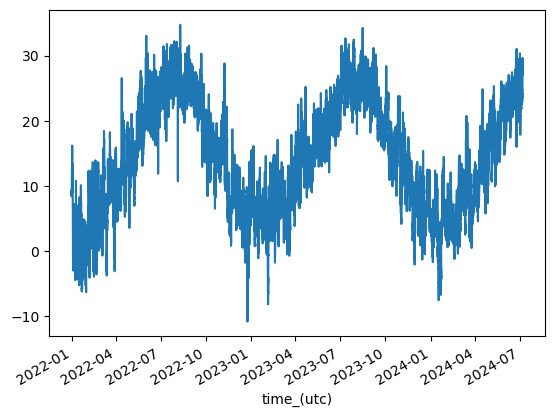

In [433]:
merged_df.air_temperature.plot()

<Axes: xlabel='time_(utc)'>

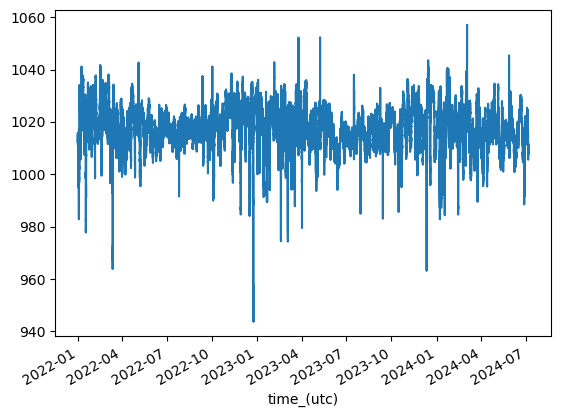

In [434]:
merged_df.air_pressure.plot()

In [435]:
z_scores = zscore(merged_df["air_pressure"].dropna())
outliers = abs(z_scores) > 3
merged_df["air_pressure"].loc[outliers] = np.nan
print(z_scores)

time_(utc)
2022-01-01 00:00:00   -0.374243
2022-01-01 00:06:00   -0.409511
2022-01-01 00:12:00   -0.411943
2022-01-01 00:18:00   -0.453292
2022-01-01 00:24:00   -0.390053
                         ...   
2024-07-05 23:30:00   -1.164739
2024-07-05 23:36:00   -1.161091
2024-07-05 23:42:00   -1.150145
2024-07-05 23:48:00   -1.133119
2024-07-05 23:54:00   -1.130687
Name: air_pressure, Length: 217287, dtype: Float64


<Axes: xlabel='time_(utc)'>

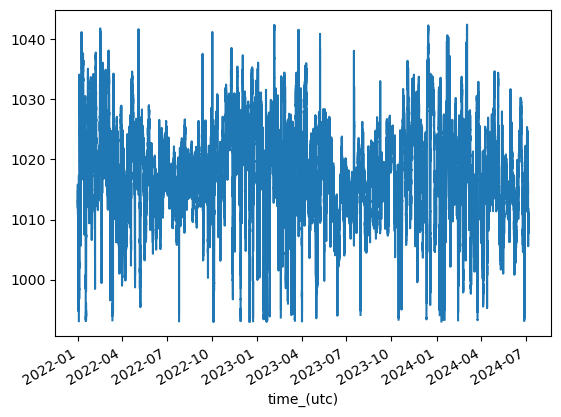

In [437]:
merged_df.air_pressure.plot()

<Axes: xlabel='time_(utc)'>

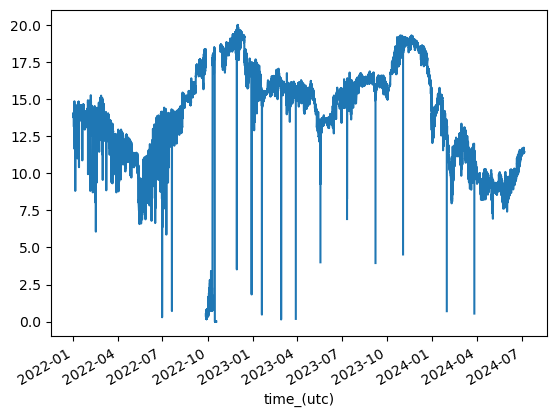

In [ ]:
merged_df.salinity.plot()

<Axes: xlabel='time_(utc)'>

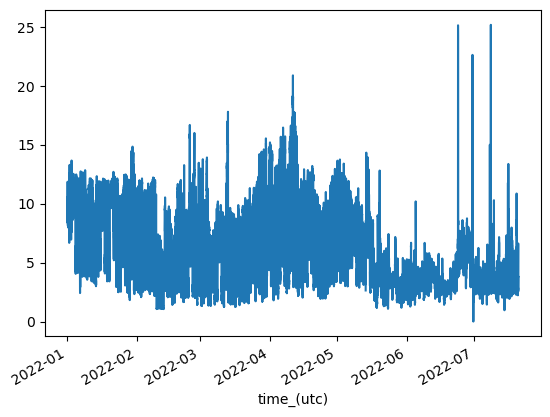

In [ ]:
merged_df.chlorophyll.plot()

<Axes: xlabel='time_(utc)'>

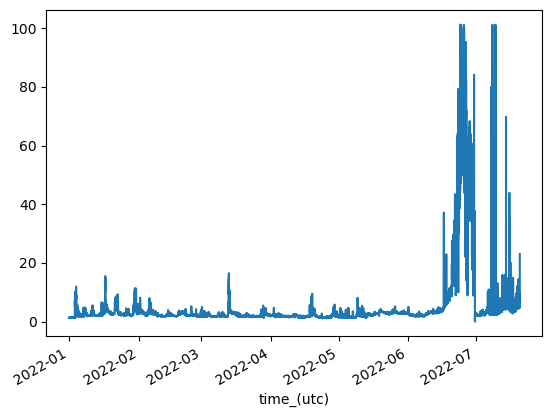

In [ ]:
merged_df.turbidity.plot()

<Axes: xlabel='time_(utc)'>

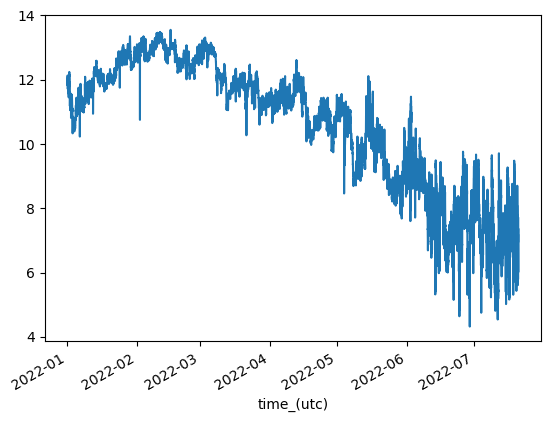

In [ ]:
merged_df.oxygen.plot()

In [ ]:
merged_df.loc[
    (merged_df["oxygen"] < 0) | (merged_df["oxygen"] > 40), "oxygen"
] = np.nan

<Axes: xlabel='time_(utc)'>

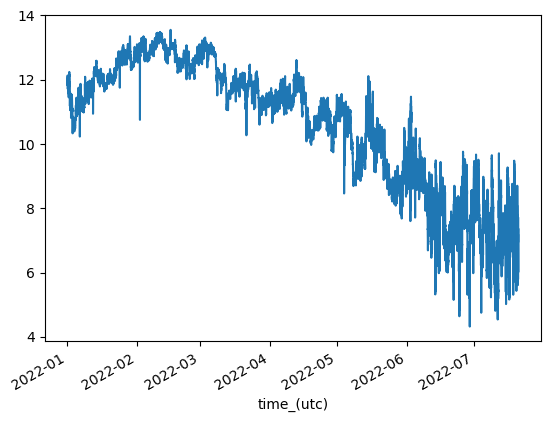

In [ ]:
merged_df.oxygen.plot()

<Axes: xlabel='time_(utc)'>

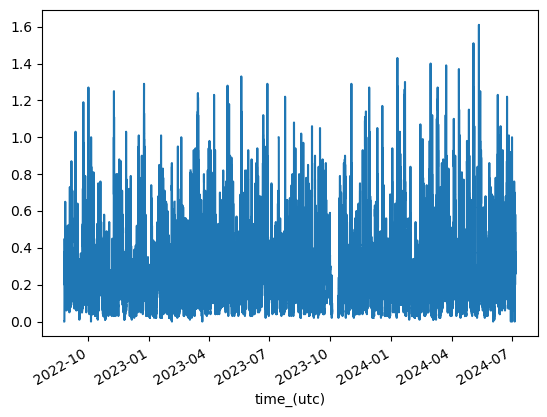

In [ ]:
merged_df.loc[
    (merged_df["significant_wave_height"] < -1)
    | (merged_df["significant_wave_height"] > 40),
    "significant_wave_height",
] = np.nan
merged_df.significant_wave_height.plot()

<Axes: xlabel='time_(utc)'>

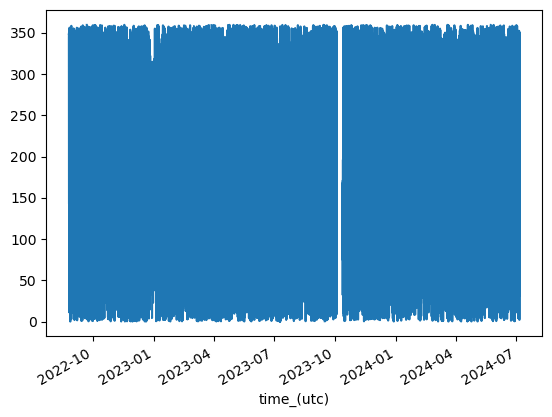

In [ ]:
merged_df.wave_from_direction.plot()

<Axes: xlabel='time_(utc)'>

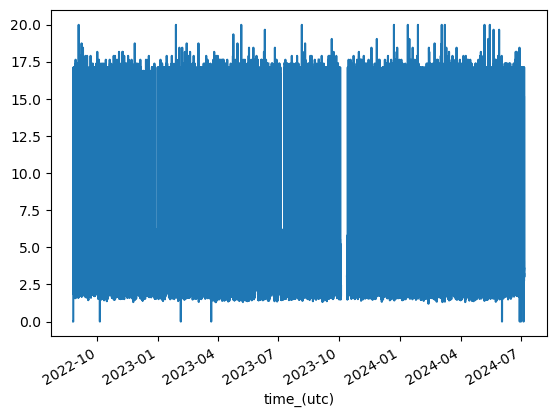

In [ ]:
merged_df.wave_period.plot()

<Axes: xlabel='time_(utc)'>

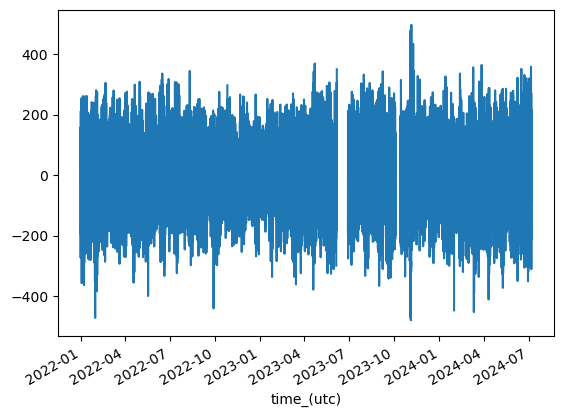

In [ ]:
merged_df.loc[
    (merged_df["north_surface_currents"] < -500)
    | (merged_df["north_surface_currents"] > 500),
    "north_surface_currents",
] = np.nan
merged_df.north_surface_currents.plot()

<Axes: xlabel='time_(utc)'>

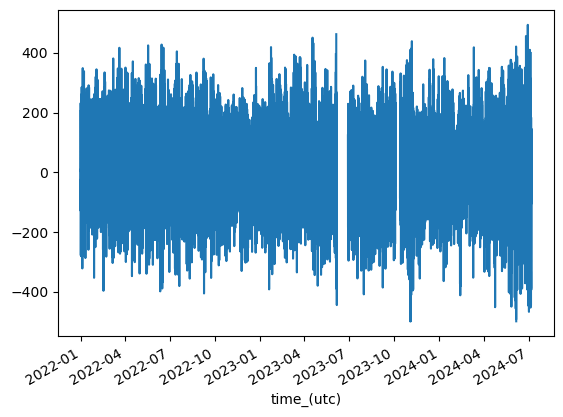

In [ ]:
merged_df.loc[
    (merged_df["east_surface_currents"] < -500)
    | (merged_df["east_surface_currents"] > 500),
    "east_surface_currents",
] = np.nan
merged_df.east_surface_currents.plot()